# Table of Contents
 <p><div class="lev3 toc-item"><a href="#Shannon-Entropy-of-the-phrase:-as-expected-it-didn't-work----&gt;-removed" data-toc-modified-id="Shannon-Entropy-of-the-phrase:-as-expected-it-didn't-work---->-removed-001"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span>Shannon Entropy of the phrase: as expected it didn't work ---&gt; removed</a></div><div class="lev3 toc-item"><a href="#Another-variables-take-from-kaggle-(frequency-of-the-question)-###-ELIMINATED" data-toc-modified-id="Another-variables-take-from-kaggle-(frequency-of-the-question)-###-ELIMINATED-002"><span class="toc-item-num">0.0.2&nbsp;&nbsp;</span>Another variables take from kaggle (frequency of the question) ### ELIMINATED</a></div><div class="lev3 toc-item"><a href="#Using-pyenchant-to-correct-misspelled" data-toc-modified-id="Using-pyenchant-to-correct-misspelled-003"><span class="toc-item-num">0.0.3&nbsp;&nbsp;</span>Using pyenchant to correct misspelled</a></div><div class="lev3 toc-item"><a href="#Conclusione:-NON-CORREGGERE-NIENTE" data-toc-modified-id="Conclusione:-NON-CORREGGERE-NIENTE-004"><span class="toc-item-num">0.0.4&nbsp;&nbsp;</span>Conclusione: NON CORREGGERE NIENTE</a></div><div class="lev3 toc-item"><a href="#Train-Logit-Model" data-toc-modified-id="Train-Logit-Model-005"><span class="toc-item-num">0.0.5&nbsp;&nbsp;</span>Train Logit Model</a></div><div class="lev3 toc-item"><a href="#Tentativi-di-Tagger" data-toc-modified-id="Tentativi-di-Tagger-006"><span class="toc-item-num">0.0.6&nbsp;&nbsp;</span>Tentativi di Tagger</a></div><div class="lev3 toc-item"><a href="#Proprietà-transitiva:-q-è-duplicata-di-B-e-anche-di-C-allora-B-e-C-sono-tra-loro-duplicati" data-toc-modified-id="Proprietà-transitiva:-q-è-duplicata-di-B-e-anche-di-C-allora-B-e-C-sono-tra-loro-duplicati-007"><span class="toc-item-num">0.0.7&nbsp;&nbsp;</span>Proprietà transitiva: q è duplicata di B e anche di C allora B e C sono tra loro duplicati</a></div><div class="lev3 toc-item"><a href="#Check-number-of-1's-in-the-test-on-the-LB-using-logloss-value-for-a-fixed-prediction-probability" data-toc-modified-id="Check-number-of-1's-in-the-test-on-the-LB-using-logloss-value-for-a-fixed-prediction-probability-008"><span class="toc-item-num">0.0.8&nbsp;&nbsp;</span>Check number of 1's in the test on the LB using logloss value for a fixed prediction probability</a></div><div class="lev3 toc-item"><a href="#creazione-tagger_counter" data-toc-modified-id="creazione-tagger_counter-009"><span class="toc-item-num">0.0.9&nbsp;&nbsp;</span>creazione tagger_counter</a></div><div class="lev3 toc-item"><a href="#Tuning-w2v" data-toc-modified-id="Tuning-w2v-0010"><span class="toc-item-num">0.0.10&nbsp;&nbsp;</span>Tuning w2v</a></div><div class="lev3 toc-item"><a href="#Create-data-for-cluster" data-toc-modified-id="Create-data-for-cluster-0011"><span class="toc-item-num">0.0.11&nbsp;&nbsp;</span>Create data for cluster</a></div><div class="lev3 toc-item"><a href="#Ensamble-stuff" data-toc-modified-id="Ensamble-stuff-0012"><span class="toc-item-num">0.0.12&nbsp;&nbsp;</span>Ensamble stuff</a></div><div class="lev4 toc-item"><a href="#NN-xgb-ensemble" data-toc-modified-id="NN-xgb-ensemble-00121"><span class="toc-item-num">0.0.12.1&nbsp;&nbsp;</span>NN-xgb ensemble</a></div>

### Shannon Entropy of the phrase: as expected it didn't work ---> removed

In [ ]:
def entropy(string):
    "Calculates the Shannon entropy of a string"
    # get probability of chars in string
    prob = [
        0 if len(string)==0 else
        float(string.count(c)) / len(string)
        for c in dict.fromkeys(list(string))
    ]
    # calculate the entropy
    entropy = -sum([p * np.log(p) / np.log(2.0) for p in prob])
    return entropy


def entropy_ideal(length):
    "Calculates the ideal Shannon entropy of a string with given length"
    prob = 0.0000001 if length == 0 else 1.0 / length
    return -1.0 * length * prob * np.log(prob) / np.log(2.0)

In [ ]:
train_df['entropy1'] = train_df.apply(axis=1, func=lambda x:entropy(x['question1']))
train_df['entropy2'] = train_df.apply(axis=1, func=lambda x:entropy(x['question2']))

train_df['entropy_ideal1'] = train_df.apply(axis=1, func=lambda x:entropy_ideal(len(x['question1'])))
train_df['entropy_ideal2'] = train_df.apply(axis=1, func=lambda x:entropy_ideal(len(x['question2'])))

train_df['diff_entropy1'] = train_df['entropy_ideal1'] - train_df['entropy1']
train_df['diff_entropy2'] = train_df['entropy_ideal2'] - train_df['entropy2']

train_df['diff_entropy_diff'] = np.abs(train_df['diff_entropy1'] - train_df['diff_entropy2'])

train_df['diff_entropy'] = np.abs(train_df['entropy1'] - train_df['entropy2'])
train_df['diff_entropy_ideal'] = np.abs(train_df['entropy_ideal1'] - train_df['entropy_ideal2'])

In [ ]:
test_df['entropy1'] = test_df.apply(axis=1, func=lambda x:entropy(x['question1']))
test_df['entropy2'] = test_df.apply(axis=1, func=lambda x:entropy(x['question2']))
test_df['entropy_ideal1'] = test_df.apply(axis=1, func=lambda x:entropy_ideal(len(x['question1'])))
test_df['entropy_ideal2'] = test_df.apply(axis=1, func=lambda x:entropy_ideal(len(x['question2'])))
test_df['diff_entropy1'] = test_df['entropy_ideal1'] - test_df['entropy1']
test_df['diff_entropy2'] = test_df['entropy_ideal2'] - test_df['entropy2']
test_df['diff_entropy_diff'] = np.abs(test_df['diff_entropy1'] - test_df['diff_entropy2'])
test_df['diff_entropy'] = np.abs(test_df['entropy1'] - test_df['entropy2'])
test_df['diff_entropy_ideal'] = np.abs(test_df['entropy_ideal1'] - test_df['entropy_ideal2'])

### Another variables take from kaggle (frequency of the question) ### ELIMINATED ####
- https://www.kaggle.com/jturkewitz/magic-features-0-03-gain
- calculate the frequencies of a question in the dataframe and saving them into a dictionary
- add a features which is how many times the questions occurred using the previous dictionary for both q1 and q2
- here we are using both test and train questions to get more stats

In [ ]:
from collections import Counter
d_freq = Counter(
    test_df.question1.append([
        test_df.question2, train_df.question1, train_df.question2
    ]).reset_index(drop=True).values)

In [ ]:
train_df['q1_freq'] = train_df.apply(axis=1, func=lambda x: d_freq[x['question1']])
train_df['q2_freq'] = train_df.apply(axis=1, func=lambda x: d_freq[x['question2']])

### Using pyenchant to correct misspelled

In [3]:
import enchant

In [2]:
from itertools import chain

def flatmap(f, items):
    return chain.from_iterable(map(f, items))

def get_words(x):
    return remove_punctuations(x).split(' ')

In [ ]:
from collections import Counter
all_unique_quests = set(
    list(set(train_df['question1'])) + list(set(train_df['question2'])) +
    list(set(test_df['question1'])) + list(set(test_df['question2'])))
all_words = flatmap(get_words, all_unique_quests)
cnt_words = Counter(all_words)

In [ ]:
len(cnt_words.keys())

In [ ]:
a = cnt_words.most_common(100000)

In [4]:
en = enchant.Dict('en_US')

In [ ]:
for i in range(0-1 -100, -1):
    if not sum([c.isupper() for c in a[i][0]]):
        print(a[i], en.suggest(a[i][0]), sep='\n', end='\n\n')

In [7]:
# d = enchant.DictWithPWL("en_US", "../../Documents/myDataScience/Data_nlp/mywords.txt")
d = enchant.DictWithPWL("en_US")
chkr = SpellChecker(d)

per correggere per bene servirebbe:
- lista nomi film
- lista recenti parole inglesi tipo app, sms
- buzz words del momento tipo bitcoin
- lista siti internet
- elenco città del mondo
- chi più ne ha più ne metta

forse conbiene mettere tutta la lista di parole su cui ha trainato google? però gli errori li c'erano

anche usare le parole più frequenti della chat non va bene

### Conclusione: NON CORREGGERE NIENTE

In [ ]:
fanboys
['fan boys', 'fan-boys', 'Sanborn', 'Barnabas', 'cannabis']
screenshot
['screen shot', 'screen-shot', 'screens hot', 'screens-hot', 'screenwriter', 'touchscreen', 'sunscreen', 'screene
bootloader
['boot loader', 'boot-loader', 'bootlegger', 'autoloader', 'boatload', 'reloader', 'bootlaces', 'bootlegged']

## cosa farci? lui vorrebbe o separale o metterci - nel mezzo, dovrei chiedere di non separare mai le parole?
## attualmente stiamo sostituendo gli - con spazi, ma la gente non scrive con - in genere
## conclusione: corregge molte parole scritte male (e ci sono) però ammazza parole che sono uniche e quindi
## dovrebbero parlare molto della frase

In [10]:
i = 0
for q2 in train_df.question1.values:
    i += 1
    if i> 1000:
        break
    chkr.set_text(q2)
    for err in chkr:
        if not sum([c.isupper() for c in err.word]):
            print(q2)
            print(err.word)
            print(chkr.suggest(err.word), '\n\n')

What is the step by step guide to invest in share market in india?
india
['India', 'indie', 'Indian', 'Indira', 'Ind', 'ind', 'Indy', 'Oneida', 'Indra', 'Inuit', 'innit', 'Indies', 'indies', 'Nadia', 'Enid', 'Anita', 'Ida', 'Ina', "India's", 'Indiana', 'indigo', 'indite', 'indium', 'and', 'end', 'int', 'Hindi', 'Linda', 'kinda', 'idea'] 


Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?
quikly
['quickly', 'quill', 'quirky', 'quietly', 'quaky', 'quail', 'quick', 'quirk', 'wkly', 'luckily', 'murkily', 'gully', 'quell', 'likely', 'quirks', 'sickly', 'July', 'giggly', 'jiggly', 'squiggly', 'cockily', 'gawkily', 'jerkily', 'ugly', 'queerly', 'quicker', 'quickie', 'cagily', "quick's", "quirk's", 'Aquila', 'curly', 'gaily', 'girly', 'guile', 'quake'] 


Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?
di
['DI', 'Di', 'DUI', 'Dir', 'Du', 'die', 'do', 'ID', 'id', 'D', 'd', 'DWI', 'Dis', 'did', 'dig', 'dim', 'din', 'dip', 'dis', 'div', 'Si

### Train Logit Model

In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve
# from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler

GridSearchCV = sklearn.grid_search.GridSearchCV
train_test_split = sklearn.cross_validation.train_test_split

features = list(set(train_df.columns) - set(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate']))
scaler = MinMaxScaler().fit(df[features])
X = scaler.transform(df[features])
#X = df[features]
y = df['is_duplicate']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
clf = LogisticRegression()
grid = {
    'C': [1e-6, 1e-3, 1e0],
    'penalty': ['l1', 'l2']
}
cv = GridSearchCV(clf, grid, scoring='log_loss', n_jobs=-1, verbose=1)
cv.fit(X_train, y_train)

In [ ]:
cv.score(X_test, y_test)

In [ ]:
0.65004704695703419, 0.65

In [ ]:
colors = ['r', 'g', 'b', 'y', 'k', 'c', 'm', 'brown', 'r']
lw = 1
Cs = [1e-6, 1e-4, 1e0]

plt.figure(figsize=(12, 8))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for different classifiers')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

labels = []
for idx, C in enumerate(Cs):
    clf = LogisticRegression(C=C)
    clf.fit(X_train, y_train)
    print("C: {}, parameters {} and intercept {}".format(
        C, clf.coef_, clf.intercept_))
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=colors[idx])
    labels.append("C: {}, AUC = {}".format(C, np.round(roc_auc, 4)))

plt.legend(['random AUC = 0.5'] + labels)
plt.show()

In [ ]:
pr, re, _ = precision_recall_curve(y_test, cv.best_estimator_.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,8))
plt.plot(re, pr)
plt.title('PR Curve (AUC {})'.format(auc(re, pr)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

### Tentativi di Tagger

In [ ]:
from joblib import Parallel, delayed
import multiprocessing

In [ ]:
def add_tagger(train_df, question, tagger):
    num_cores = multiprocessing.cpu_count()
    train_df[tagger] = pd.Series(
        Parallel(n_jobs=num_cores)(delayed(tag_phrase)(text)
                                   for text in train_df[question])

In [ ]:
def parallel_tagger(df, start, stop):
    step = 10000
    num_cores = multiprocessing.cpu_count()
    return Parallel(n_jobs=num_cores)(
        delayed(sum_quests_and_tag)(df.loc[i:i+step])
        for i in range(start, stop, step))

### Proprietà transitiva: q è duplicata di B e anche di C allora B e C sono tra loro duplicati

In [ ]:
df = train_df[train_df.is_duplicate == 1]

qid1_qid2_dup = (df[['qid1',
                     'qid2']].groupby('qid1')['qid2'].apply(list)).to_dict()
qid2_qid1_dup = (df[['qid1',
                     'qid2']].groupby('qid2')['qid1'].apply(list)).to_dict()


def get_value_dict(d, v):
    r = []
    try:
        r = d[v]
    except KeyError:
        pass
    return r


def get_qid_grouped(n_g):
    qid_g = get_value_dict(qid1_qid2_dup, n_g).copy()
    qid_g.extend(get_value_dict(qid2_qid1_dup, n_g))
    while True:
        temp = qid_g.copy()
        for l in temp:
            qid_g.extend(get_value_dict(qid1_qid2_dup, l))
            qid_g.extend(get_value_dict(qid2_qid1_dup, l))
        qid_g = list(set(qid_g))
        if len(temp) == len(qid_g): break
    return qid_g


run_on_me = set(list(df.qid1) + list(df.qid2))
group_dict = {}
while len(run_on_me) != 0:
    i = next(iter(run_on_me))
    group_dict[i] = get_qid_grouped(i)
    run_on_me = run_on_me - set(group_dict[i])

# q1 and q2 are never the same question
print(len(df[df.qid1 == df.qid2]))

present_cases1 = set(
    df[['qid1', 'qid2']].apply(axis=1, func=lambda x: (x['qid1'], x['qid2'])))
present_cases2 = set(
    df[['qid1', 'qid2']].apply(axis=1, func=lambda x: (x['qid2'], x['qid1'])))

# check if there are duplicate q1-q2 pairs (q2-q1) -----> It tooked a long time, no duplicate pairs found
# in the original dataframe
# [j for j in present_cases if (j[1], j[0]) in present_cases] # ---> RESULT: []

all_combo = []
for ng in group_dict:
    for i, l in enumerate(group_dict[ng]):
        for j in group_dict[ng][i + 1:]:
            all_combo.append((l, j))
new_combo = list((set(all_combo) - set(present_cases1)) - set(present_cases2))

print(
    len(all_combo),
    len(new_combo),
    len(present_cases1), len(present_cases2), len(new_combo) / len(all_combo))



dq = (df[['qid1', question1]].set_index('qid1',
                                          drop=True)).to_dict()[question1]
dq.update((df[['qid2', question2]].set_index(
    'qid2', drop=True)).to_dict()[question2])

new_df = pd.DataFrame(
    list(map(lambda x: (x[0], x[1], dq[x[0]], dq[x[1]], 1), new_combo)),
    columns=['qid1', 'qid2', question1, question2, 'is_duplicate'])

train_df = pd.concat(axis=0, objs=[train_df, new_df])
train_df.reset_index(drop=True, inplace=True)
train_df['id'] = train_df.index

### Check number of 1's in the test on the LB using logloss value for a fixed prediction probability

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import log_loss

In [47]:
## we use the fact that we know the logloss value of 0.37, user your value for a new try
myp = 1
mylogloss = 28
p = [myp] * 10000
l = np.array([log_loss([1] * r + [0] * (10000 - r), p) for r in range(1, 10000)])
x = np.arange(0.01, 100, 0.01)

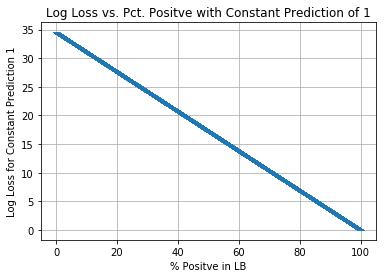

In [48]:
plt.plot(x, l, '_')
plt.title('Log Loss vs. Pct. Positve with Constant Prediction of {}'.format(myp))
plt.xlabel('% Positve in LB')
plt.ylabel('Log Loss for Constant Prediction {}'.format(myp))
plt.grid()
plt.show()

percentage of 1 in prediction is: 0.19


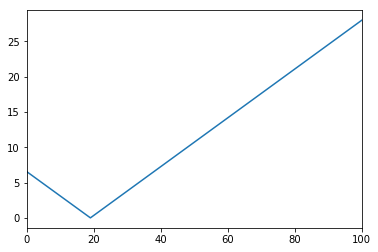

In [53]:
df_check = pd.Series(data=np.abs(l - mylogloss), index=x)
print('percentage of 1 in prediction is: {}'.format(x[int(df_check.argmin())]))
df_check.plot();
plt.show()

### creazione tagger_counter

In [ ]:
tagger = pd.read_csv('/home/ale/random_program/Quora_double_question/risultato_tagger.csv', encoding='latin1')


def recover_tagg_list(tag_string):
    l = [
        re.split(r'[\'\"],\s[\'\"]', t[2:-1])
        for t in tag_string[1:-2].split('], ')
    ]
    return l

def tagged_ppf_verb(x):
    app = recover_tagg_list(x)
    return ([i[1] for i in app if len(i) > 1])


tagger['new'] = tagger.apply(
    axis=1, func=lambda x: Counter(tagged_ppf_verb(x['tagger'])))
dizionario = tagger.set_index('quest_final')['new'].to_dict()

import pickle


def save_obj(obj, name):
    with open('./' + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)


def load_obj(name):
    with open('./' + name + '.pkl', 'rb') as f:
        return pickle.load(f)


save_obj(dizionario, 'tag_counter')

In [ ]:
dizionario_max = pd.read_csv(
    '/home/ale/random_program/Quora_double_question/tagged_list_counted_solved.csv',
    sep=";",
    encoding='latin1')
dizionario_max = dizionario_max.set_index('name')['tag_recod'].to_dict()
save_obj(dizionario_max, 'tag_max_freq')

In [ ]:
alltag = from_tag_tocluster(tagger[0:100]['tagger'].values)
app = pd.DataFrame(alltag.groupby(['name', 'tag']).size()).reset_index()
app.columns =['name','tag','count']
app.to_csv('.\\taggestlist_count.csv',sep=";")

def recodtag(x):
    if x[0] == 'N':
        return('NOUN')
    elif x[0] == 'V':
        return('VERB')
    elif x[0] == 'J':
        return('JJ')
    else:
        return(x)

app['tag_recod'] = app.apply(axis=1, func = lambda x: recodtag(x.tag))
app2 = pd.DataFrame(app.groupby(['name','tag_recod'])['count'].sum()).reset_index()
app2.columns =['name','tag_recod','count']
app3 = pd.DataFrame(app2.groupby(['name'])['count'].max()).reset_index()
app3 = pd.merge(app3, app2, on =['name','count'])
app3.to_csv('.\\tagged_list_counted_solved.csv',sep=";")
app3

### Tuning w2v

** The hyper-parameter choice is crucial for performance (both speed and accuracy):
- architecture: skip-gram (slower, better for infrequent words) vs CBOW (fast)the training 
- algorithm: hierarchical softmax (better for infrequent words) vs negative sampling (better for frequent words, better with low dimensional vectors)
- sub-sampling of frequent words: can improve both accuracy and speed for large data sets (useful values are in range 1e-3 to 1e-5)
- context (window) size: for skip-gram usually around 10, for CBOW around 5
- alpha is the initial learning rate (will linearly drop to min_alpha as training progresses).
- min_count = ignore all words with total frequency lower than this.
- negative = if > 0, negative sampling will be used, the int for negative specifies how many “noise words” should be drawn (usually between 5-20). Default is 5. If set to 0, no negative samping is used.
- cbow_mean = if 0, use the sum of the context word vectors. If 1 (default), use the mean. Only applies when cbow is used.
- iter = number of iterations (epochs) over the corpus. Default is 5.
- batch_words = target size (in words) for batches of examples passed to worker threads (and thus cython routines). Default is 10000. 
- 



The model can be stored/loaded via its save() and load() methods, or stored/loaded in a format compatible with the original word2vec implementation via wv.save_word2vec_format() and KeyedVectors.load_word2vec_format().

If you’re finished training a model (=no more updates, only querying), then switch to the gensim.models.KeyedVectors instance in wv

 word_vectors = model.wv
 del model
to trim unneeded model memory 

In [ ]:
def get_train(m, win, s, sort, m_c, h):
    print('New model:', m, win, s, sort, m_c, h)
    model = word2vec.Word2Vec(
        corpus,
        size=s,
        window=win,
        min_count=m_c,
        workers=4,
        sorted_vocab=sort,
        hs=h,
        iter=10,
        sg=m,
        negative=10)

    df = train_df[[q1, q2, 'is_duplicate']].copy()
    tempvar = df.apply(
        axis=1, func=lambda x: getback_function(pca_vars(x[q1], x[q2], model)))
    tempvar.columns = ['diff_eigenv_pca', 'cos_pca', 'diff_ratio_ecc_pca']
    #  + ['first_pca_'] + str(i) for i in range(0, model.vector_size + 1)
    df = pd.concat([df, tempvar], axis=1)
    df.fillna(0, inplace=True)

    tempvar = df.apply(
        axis=1,
        func=
        lambda x: getback_function(get_W2V_variables(x[q1], x[q2], model)))
    tempvar.columns = [
        'norm_mean_wv', 'norm_sum_wv', 'cos_mean_wv', 'cos_sum_wv'
    ]
    #  + ['vect_diff_'] + str(i) for i in range(0, model.vector_size + 1)
    df = pd.concat([df, tempvar], axis=1)
    df.replace(np.inf, np.nan, inplace=True)
    df.fillna(0, inplace=True)

    eventuali = [
        'question1_clear_1', 'question2_clear_1', 'question1_clear_1_clear_2',
        'question1_clear_1_clear_2', 'question2_clear_1_clear_2',
        'question1_final', 'question2_final'
    ]
    features = list(
        set(df.columns) -
        set(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'] +
            eventuali))

    x_train = df[features + ['is_duplicate']]

    model_xgb, roc_auc_test, roc_auc_train, var_imp = train_xgboost(
        x_train, features, 'is_duplicate', params, other_par)

In [ ]:
#150 the best
for s in [120, 135, 150, 165, 180]:
    get_train(0, 5, s, 1, 5, 0)
    
for h in [0, 1]:
    get_train(0, 5, 150, 1, 5, h)

for sort in [-1, 1]:
    get_train(0, 5, 150, sort, 5, 0)

for m in [0, 1]:
    win = 5 if m == 0 else 10
    get_train(m, win, 150, 1, 5, 0)

To speed up most_similar we can use a restriction in the vocab, restriction in the top most similarities don't help

Find the top-N most similar words. Positive words contribute positively towards the
similarity, negative words negatively.

This method computes cosine similarity between a simple mean of the projection
weight vectors of the given words and the vectors for each word in the model.
The method corresponds to the `word-analogy` and `distance` scripts in the original
word2vec implementation.

If topn is False, most_similar returns the vector of similarity scores.

`restrict_vocab` is an optional integer which limits the range of vectors which
are searched for most-similar values. For example, restrict_vocab=10000 would
only check the first 10000 word vectors in the vocabulary order. (This may be
meaningful if you've sorted the vocabulary by descending frequency.)


In [ ]:
model.most_similar('house', restrict_vocab=100)

### Create data for cluster

In [ ]:
def from_tag_tocluster(tagg_string):
    non_for_cluster = ['SENT', '(', 'CD', ')', ',', ':', '``']
    df_for_cluster = pd.DataFrame([(i[2], i[1])
                                   for t in tagg_string
                                   for i in recover_tagg_list(t) 
                                   if (len(i) == 3) and (i[1] not in non_for_cluster)])
    df_for_cluster.columns = ['name', 'tag']
    df_for_cluster.drop_duplicates(inplace=True)
    df_for_cluster.reset_index(drop=True, inplace=True)
    df_for_cluster['name'] = df_for_cluster.apply(axis=1, func=lambda x:x['name'].lower())
    df_for_cluster.drop_duplicates(inplace=True)
    return df_for_cluster

In [ ]:
df_for_cluster = from_tag_tocluster( df['tagger'].values )
df_for_cluster.to_csv('clusterizzami_sto_vocabolario.csv')

In [ ]:
df_for_cluster = pd.read_csv('clusterizzami_sto_vocabolario.csv', encoding='latin1', usecols=range(1,3))

In [ ]:
tag_verbs = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
tag_adverbs = ['RB','RBR','RBS']
tag_adjective = ['JJ','JJR','JJS']
tag_nouns = ['NN','NNS','NP','NPS']

In [ ]:
verbs = df_for_cluster[df_for_cluster.apply(axis=1, func=lambda x:x['tag'] in tag_verbs)]['name']
adverbs = df_for_cluster[df_for_cluster.apply(axis=1, func=lambda x:x['tag'] in tag_adverbs)]['name']
adjective = df_for_cluster[df_for_cluster.apply(axis=1, func=lambda x:x['tag'] in tag_adjective)]['name']
nouns = df_for_cluster[df_for_cluster.apply(axis=1, func=lambda x:x['tag'] in tag_nouns)]['name']

verbs = verbs.drop_duplicates().reset_index(drop=True)
adverbs = adverbs.drop_duplicates().reset_index(drop=True)
adjective = adjective.drop_duplicates().reset_index(drop=True)
nouns = nouns.drop_duplicates().reset_index(drop=True)

In [ ]:
len(verbs), len(adverbs), len(adjective), len(nouns)

In [ ]:
'FW': 'Foreign word', --> variable has_foreign_word (and-or q1-q2)
## potenzialmetne utile, da controllare meglio:
'DT': 'Determiner',
'MD': 'Modal',
'SYM': 'Symbol',
'UH': 'Interjection',

In [ ]:
from nltk.corpus import wordnet as wn
def simple_distance(x_hx, y_hy, ix, iy):
    hx, hy = x_hx[1][ix], y_hy[1][iy]
    try:
        xy_c = next(i for j in hx for i in hy if i == j)
    except StopIteration:
        return 1
    n_x, n_y = len(hx), len(hy)
    try:
        return (((hx.index(xy_c) + 1) / n_x) + (
            (hy.index(xy_c) + 1) / n_y)) / 2
    except ValueError:
        return 1


def noun_similarity(x, y, name_sin):
    nhx = len(name_sin[x][1])
    nhy = len(name_sin[y][1])
    return min([
        1 - simple_distance(name_sin[x], name_sin[y], ix, iy)
        for ix in range(0, nhx) for iy in range(0, nhy)
    ])


def gethypernyms(x):
    out = wn.synsets(x, lang='eng')
    if len(out) != 0:
        out = out[0]
    else:
        out = wn.synsets('entity', lang='eng')[0]
    return (out, [l[::-1] for l in out.hypernym_paths()])

In [ ]:
myverbs = sorted( set(verbs.values) )
name_sin = {k:gethypernyms(k) for k in myverbs}
idx_name = {i:myverbs[i] for i in range(0,len(myverbs))} 
name_idx = {k:v for v,k in idx_name.items()}

In [ ]:
from scipy import sparse
import time
def symmetrize(a):
    return a + a.T - np.eye(a.shape[0])

def create_distance_matrix(name_sin, idx_name, mysimilarity):
    start_time = time.time()
    tot = len(idx_name)
    l = [(d, row, col)
         for row in range(0, tot)
         for col in range(row, tot)
         for d in [ mysimilarity(idx_name[row], idx_name[col], name_sin) ]
         if d != 0]
    df = pd.DataFrame(l, columns=['distance', 'row', 'col'])
    data = list(df['distance'].values)
    row = list(df['row'].values)
    col = list(df['col'].values)
    matrixd = symmetrize(sparse.csr_matrix((data, (row, col))).todense())
    print('ho impiegato ' + str((time.time() - start_time) / 60) + ' minuti')
    return 1 - matrixd

In [ ]:
matrixd = create_distance_matrix(name_sin, idx_name, noun_similarity)

In [ ]:
from Clusters_helper import * 

In [ ]:
for m in range(1,10):
    print("Using {} min_samples".format(m))
    plot_eps_ncluster(matrixd, 0.1, 1, min_samples=m)

In [ ]:
for eps in np.linspace(0.0001, 1, 10):
    print("Using {} eps".format(eps))
    plot_minsamples_ncluster(matrixd, 0, 25, eps)

In [ ]:
for eps in np.linspace( 0.263231578947, 0.4, 20):
    print("eps used: ", eps)
    db = run_cluster(eps=eps, min_samples=3, X=matrixd)
    if len(set(db.labels_)) == 1:
        print('Only 1 cluster')
        continue
    print_silhouette(matrixd, db.labels_)

In [ ]:
group = pd.DataFrame(verbs, columns=['name'])

X = matrixd
db = run_cluster(eps=0.328016620498, min_samples=3, X=matrixd)
update_group(db, group, name_idx)
cluster = create_cluster_db(group, matrixd, name_idx)
update_group2(group, name_idx, matrixd, cluster)

### Ensamble stuff

In [ ]:
train = pd.read_csv('train_basic_vars.csv')
test = pd.read_csv('test_basic_vars.csv')

In [ ]:
test_2 = pd.read_csv('test_isomap_isomappca.csv')

In [ ]:
test_final = pd.concat([test.set_index('test_id'), test_2.set_index('test_id')], axis=1)

In [ ]:
eventuali = [
    'question1_clear_1', 'question2_clear_1', 'question1_clear_1_clear_2',
    'question1_clear_1_clear_2', 'question2_clear_1_clear_2',
    'question1_final', 'question2_final'
]
features = list(
    set(train.columns) -
    set(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'] +
        eventuali + ['dist_'+str(i) for i in range(0,10)]))

In [ ]:
xgb_model = ['model_tuned' + str(i) for i in range(0, 5)]
target = 'is_duplicate'
xg_train = xgb.DMatrix(train[features])
xg_test = xgb.DMatrix(test_final[features])

In [ ]:
xgb_preds_test = np.ones(len(test))
xgb_preds_train = np.ones(len(train))

In [ ]:
for m in xgb_model:
    model = xgb.Booster({'nthread':4})
    model.load_model(m)
    xgb_preds_test += model.predict(xg_test)
    print(m)
xgb_preds_test /= len(xgb_model)

In [ ]:
for m in xgb_model:
    model = xgb.Booster({'nthread':4})
    model.load_model(m)
    xgb_preds_train += model.predict(xg_train)
    print(m)
xgb_preds_train /= len(xgb_model)

In [ ]:
#### submission xgboost
submission = pd.DataFrame({'test_id': test['test_id'], 'is_duplicate': xgb_preds_test})
submission.to_csv("submission_xgbfinal.csv", index=False)

#### NN-xgb ensemble

In [ ]:
trainNN = pd.read_csv('train_predsNN.csv')
testNN = pd.read_csv('submissionNN.csv')
testNN.set_index('test_id',inplace=True)
trainNN.columns = ['preds_NN', 'is_duplicate']

In [ ]:
xgb_train_df = pd.DataFrame({'id': train['id'], 'preds_xgb': xgb_preds_train})
xgb_train_df.set_index('id',inplace=True)

In [ ]:
trainNN['preds_xgb'] = xgb_train_df['preds_xgb']

In [ ]:
for alpha in np.linspace(0, 1, 10):
    n = 'ens_'+str(alpha)
    trainNN[n] = (1.-alpha)*trainNN['preds_NN'] + alpha*trainNN['preds_xgb']
    trainNN[n+'_right'] = (trainNN[n] > 0.5) == trainNN['is_duplicate']
    print(n, sum(trainNN[n+'_right'])/len(trainNN))